<a href="https://colab.research.google.com/github/josepefg/kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio do Titanic**
## [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)  
Essa é a famosa competição do Kaggle sobre o acidente do Titanic. Ela é considerada a principal competição para iniciantes no mundo de Data Science. O objetivo dessa competição é simples, predizer os sobreviventes do acidente a partir de um modelo de Machine Learning.
![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg)

## **Obtendo os dados**  
Os dados foram divididos em dois grupos:
*   Treino (train.csv)  
*   Teste (test.csv)  
Os dados de treino devem ser utilizados para a análise e criação dos modelos de Machine Learning, enquanto que os dados de teste servem para avaliar o modelo criado.  
Para baixar os arquivos é necessário criar uma conta no Kaggle (não se preocupe, é de graça). Para facilitar eu já baixei esses arquivos e salvei no meu repositório.




In [2]:
# importando os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv('https://raw.githubusercontent.com/josepefg/kaggle/master/data/titanic/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/josepefg/kaggle/master/data/titanic/test.csv')
# gender = pd.read_csv('data/gender_submission.csv')

### **Verificando as dimensões do dataset de treino**  
As colunas também são chamadas de variáveis ou features.

In [4]:
print("Colunas:{}\nLinhas:\t{}".format(train.shape[1], train.shape[0]))

Colunas:12
Linhas:	891


## **Entendendo os dados**  
Nesse momento vamos enteder melhor os dados que estamos trabalhando, seus tipos, quantidades, dados estatísticos entre outros.  
O modelo criado será de Aprendizado Supervisionado (Supervised Learning) e a nossa variável alvo será a coluna Surived que define se o passageiro sobreviveu ou não ao acidente.  
Abaixo estão listadas as colunas presentes no dataset e uma breve explicação sobre cada uma delas.  

Dicionário de Dados
* PassengerId: Número de identificação do passageiro
* Survived: Informa se o passageiro sobreviveu ao desastre
  * 0 = Não
  * 1 = Sim
* Pclass: Classe do bilhete
  * 1 = 1ª Classe
  * 2 = 2ª Classe
  * 3 = 3ª Classe
* Name: Nome do passageiro
* Sex: Sexo do passageiro
* Age: Idade do passageiro
* SibSp: Quantidade de cônjuges e irmãos a bordo
* Parch: Quantidade de pais e filhos a bordo
* Ticket: Número da passagem
* Fare: Preço da Passagem
* Cabin: Número da cabine do passageiro
* Embarked: Porto no qual o passageiro embarcou
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton

In [5]:
# tipo das variáveis
print(train.dtypes)

# amostra do dataset
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# estatística dos dados numéricos
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# estatística dos dados categóricos
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Mr. Benjamin",male,1601,B96 B98,S
freq,1,577,7,4,644


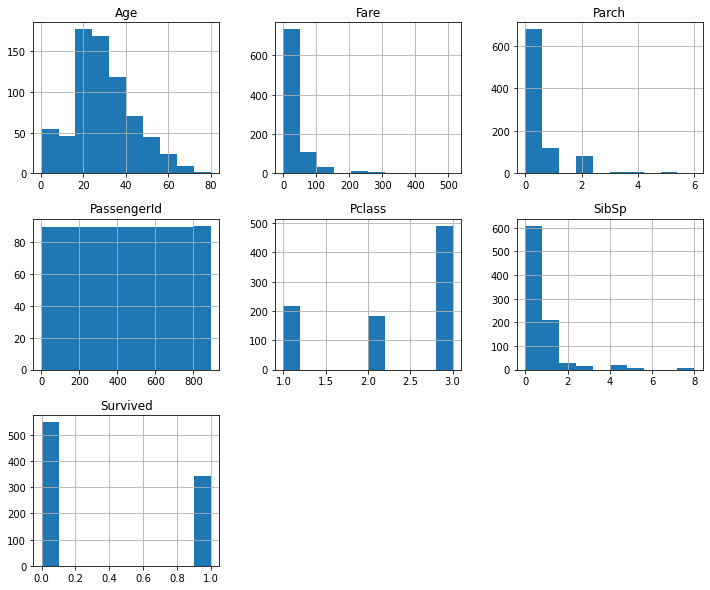

In [8]:
# distribuição da frequencia dos dados numéricos
train.hist(figsize=(12,10));

In [0]:
# Criando uma cópia para manter o dataset original
train_cp = train.copy()

In [0]:
# PassengerId, ticket, cabin e name não têm relevância para a análise
train_cp.drop(['PassengerId'], axis=1, inplace=True)
train_cp.drop(['Name'], axis=1, inplace=True)
train_cp.drop(['Ticket'], axis=1, inplace=True)
train_cp.drop(['Cabin'], axis=1, inplace=True)

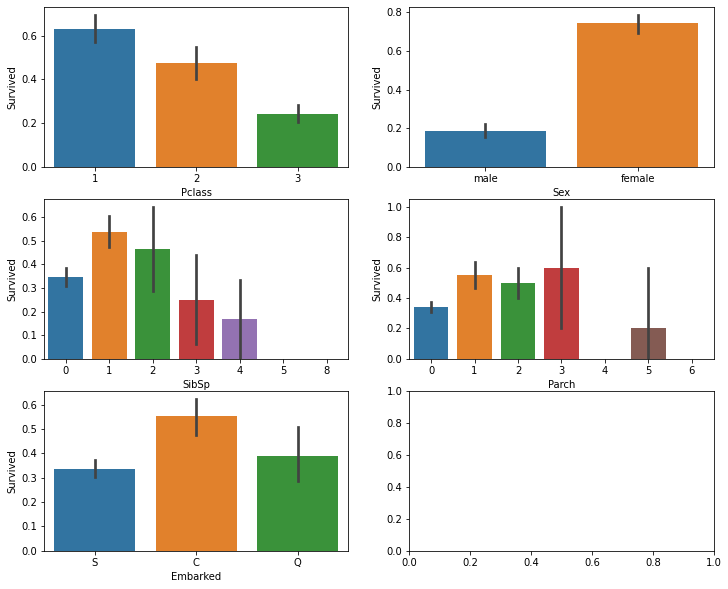

In [11]:
# Plotar os gráficos das colunas vs sobreviventes
fig, ([axis1, axis2], [axis3, axis4], [axis5, axis6]) = plt.subplots(3,2, figsize=(12,10));

sns.barplot(x='Pclass', y='Survived', data=train_cp, ax=axis1);
sns.barplot(x='Sex', y='Survived', data=train_cp, ax=axis2);
sns.barplot(x='SibSp', y='Survived', data=train_cp, ax=axis3);
sns.barplot(x='Parch', y='Survived', data=train_cp, ax=axis4);
sns.barplot(x='Embarked', y='Survived', data=train_cp, ax=axis5);

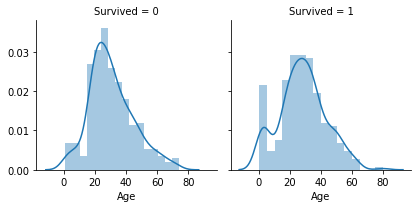

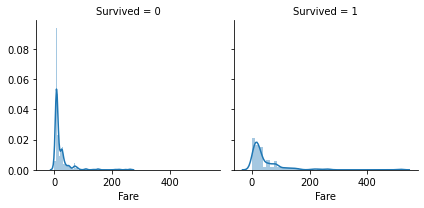

In [12]:
# Ver influência da idade e valor da passagem na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train_cp, col='Survived')
age_survived.map(sns.distplot, 'Age');

fare_survived = sns.FacetGrid(train_cp, col='Survived')
fare_survived.map(sns.distplot, 'Fare');

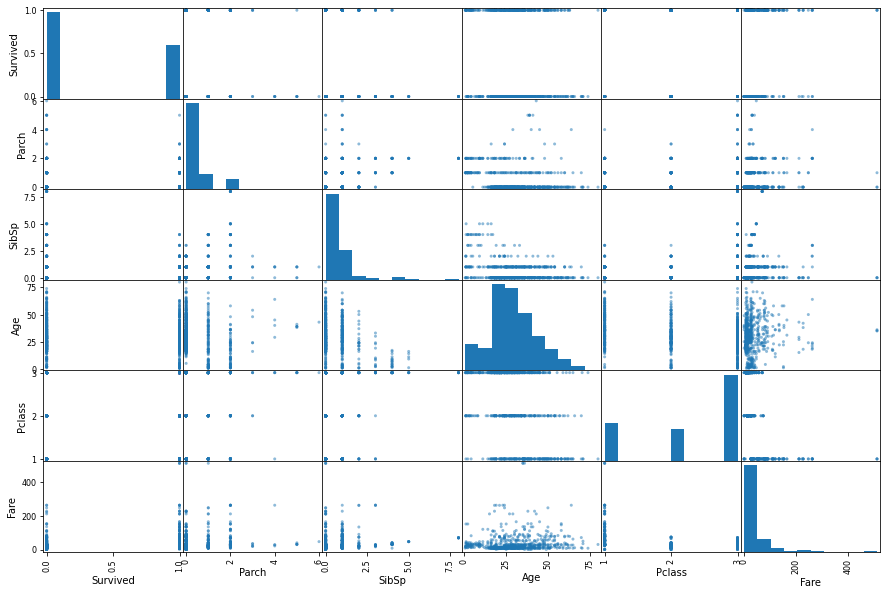

In [13]:
# Scatter matrix das colunas
columns=['Survived', 'Sex', 'Parch', 'Embarked', 'SibSp', 'Age', 'Pclass', 'Fare']
pd.plotting.scatter_matrix(train_cp[columns], figsize=(15, 10));

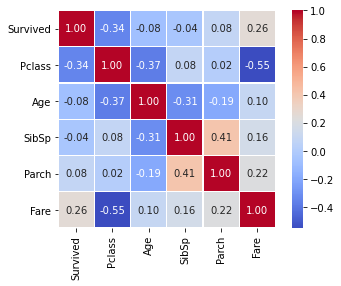

In [14]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(train_cp.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True)

## Preparação dos dados

In [61]:
# salvar os índices dos datasets para recuperação posterior
train_idx = train_cp.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submissao ao Kaggle
passengerId = test['PassengerId']

# extrair coluna 'Survived'
target = train_cp.Survived.copy()
# train_cp.drop(['Survived'], axis=1, inplace=True)

# concatenar treino e teste em um único DataFrame
df_merged = pd.concat(objs=[train_cp, test], axis=0).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 12)


In [0]:
# Selecionar as colunas relevantes
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [63]:
# Valores faltantes nos datasets de treino e teste
df_merged.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [0]:
# Nesse ponto podemos modificar para melhorar o modelo
# age
age_median = df_merged['Age'].median()
df_merged['Age'].fillna(age_median, inplace=True)

# fare
fare_median = df_merged['Fare'].median()
df_merged['Fare'].fillna(fare_median, inplace=True)

# embarked
embarked_top = df_merged['Embarked'].value_counts()[0]
df_merged['Embarked'].fillna(embarked_top, inplace=True)

In [65]:
# Feature Engineering
# converter 'Sex' em 0 e 1
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# dummie variables para 'Embaked'
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

display(df_merged.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1.0,1,1,38.0,1,0,71.2833,0,1,0,0
2,1.0,3,1,26.0,0,0,7.9250,0,0,0,1
3,1.0,1,1,35.0,1,0,53.1000,0,0,0,1
4,0.0,3,0,35.0,0,0,8.0500,0,0,0,1


In [66]:
# Criando coluna para tamanho da familia
df_merged['FamilySize'] = df_merged['SibSp'] + df_merged['Parch'] + 1
df_merged.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0.0,3,0,22.0,1,0,7.2500,0,0,0,1,2
1,1.0,1,1,38.0,1,0,71.2833,0,1,0,0,2
2,1.0,3,1,26.0,0,0,7.9250,0,0,0,1,1
3,1.0,1,1,35.0,1,0,53.1000,0,0,0,1,2
4,0.0,3,0,35.0,0,0,8.0500,0,0,0,1,1


In [0]:
# Recuperar datasets de treino e teste
train_new = df_merged.iloc[:train_idx]
test_new = df_merged.iloc[train_idx:]

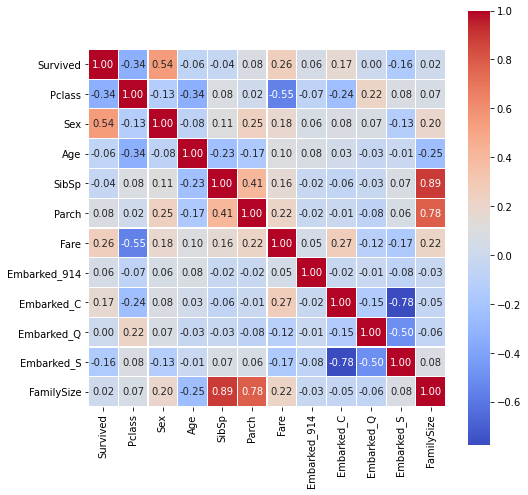

In [68]:
# Revisar correlação após colunas tratadas
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(train_new.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True)

Aqui nesse mapa de calor podemos perceber que há uma alta correlação entre as colunas Survived e Sex.

In [0]:
# Excluir coluna Survived
y = train_new["Survived"]
train_new.drop(['Survived'], axis=1, inplace=True)
test_new.drop(['Survived'], axis=1, inplace=True)

In [70]:
columns_new = train_new.columns
train_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,3,0,22.0,1,0,7.2500,0,0,0,1,2
1,1,1,38.0,1,0,71.2833,0,1,0,0,2
2,3,1,26.0,0,0,7.9250,0,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,0,1,2
4,3,0,35.0,0,0,8.0500,0,0,0,1,1


In [71]:
# Normalizando os dados
from sklearn import preprocessing

x = train_new.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_n = pd.DataFrame(x_scaled, columns=columns_new)
train_n.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.0,0.0,0.0,1.0,0.1
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.0,1.0,0.0,0.0,0.1
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,0.0,0.0,0.0,1.0,0.1
4,1.0,0.0,0.434531,0.000,0.0,0.015713,0.0,0.0,0.0,1.0,0.0


## Construção e avaliação dos modelos

In [0]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

In [73]:
# criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train_n, target)

# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(train_n, target) * 100, 2)
pred = lr_model.predict(train_n)
f1 = round(f1_score(target, pred, average='micro') * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}\nF1_Score: {}".format(acc_logReg, f1))

Acurácia do modelo de Regressão Logística: 79.91
F1_Score: 79.91


In [74]:
# criar um modelo de árvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train_n, target)

# verificar a acurácia do modelo
acc_tree = round(tree_model.score(train_n, target) * 100, 2)
pred = tree_model.predict(train_n)
f1 = round(f1_score(target, pred, average='micro') * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}\nF1_Score: {}".format(acc_tree, f1))

Acurácia do modelo de Árvore de Decisão: 82.72
F1_Score: 82.72


In [75]:
# criar um modelo de svm
svm_model = svm.SVC()
svm_model.fit(train_n, target)

# verificar a acurácia do modelo
acc_svm = round(svm_model.score(train_n, target) * 100, 2)
pred = svm_model.predict(train_n)
f1 = round(f1_score(target, pred, average='micro') * 100, 2)
print("Acurácia do modelo de SVM: {}\nF1_Score: {}".format(acc_svm, f1))

Acurácia do modelo de SVM: 81.26
F1_Score: 81.26


In [76]:
# Melhor modelo com os parâmetrod default
rf_model = RandomForestClassifier()
rf_model.fit(train_n, target)


# verificar a acurácia do modelo
acc_rf = round(rf_model.score(train_n, target) * 100, 2)
pred = rf_model.predict(train_n)
f1 = round(f1_score(target, pred, average='micro') * 100, 2)
print("Acurácia do modelo de Random Forest: {}\nF1_Score: {}".format(acc_rf, f1))

Acurácia do modelo de Random Forest: 97.98
F1_Score: 97.98


In [0]:
y_pred_tree = rf_model.predict(test_new)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_rf.csv', index=False)

![alt text](https://raw.githubusercontent.com/josepefg/kaggle/master/resources/Screenshot_1.png)

In [78]:
print('Parameters currently in use:\n')
print(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [79]:
# Melhorando o modelo de Random Forest

from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()

n_estimators = [150, 300, 500, 700, 1000]
max_depth = [3, 5]
max_features = [3, 5, 7, 10]
min_samples_split = [2, 5, 7,]
min_samples_leaf = [1, 2, 3] 
criterion = ['gini', 'entropy']
max_leaf_nodes = [20, 30, 45]

hyperF = dict(max_features = max_features, n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf, max_leaf_nodes = max_leaf_nodes)

hyperF = dict(max_features = max_features, n_estimators = n_estimators)

gridF = GridSearchCV(rf_model, hyperF, cv = 10, verbose = 1, 
                      n_jobs = -1)
gridF.fit(train_n, target)

gridF.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.9min finished


{'max_features': 7, 'n_estimators': 700}

In [59]:
rf_model_new = RandomForestClassifier(**gridF.best_params_)

rf_model_new.fit(train_n, target)

# verificar a acurácia do modelo
acc_rf = round(rf_model_new.score(train_n, target) * 100, 2)
pred = rf_model_new.predict(train_n)
f1 = round(f1_score(target, pred, average='micro') * 100, 2)
print("Acurácia do modelo de Random Forest: {}\nF1_Score: {}".format(acc_rf, f1))

Acurácia do modelo de Random Forest: 98.2
F1_Score: 98.2


In [0]:
y_pred_tree = rf_model_new.predict(test_new)

submission = pd.DataFrame({
    "PassengerId": passengerId,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_rf_new.csv', index=False)

![alt text](https://raw.githubusercontent.com/josepefg/kaggle/master/resources/Screenshot_15.png)